In [28]:
## Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

## Load the data

In [30]:
data=pd.read_csv('Country-clusters.csv')

In [31]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Plot the data

<function matplotlib.pyplot.show(close=None, block=None)>

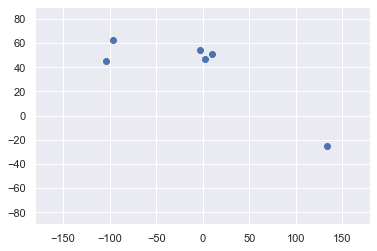

In [32]:
plt.scatter(data["Longitude"],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

## Select the features

In [35]:
## we want to cluster our dataset by geographical proximity

x=data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

In [47]:
##  we want to now create a kmeans object with three clusters
kmeans=KMeans(3)

In [48]:
kmeans.fit(x)

KMeans(n_clusters=3)

## Clustering results

In [49]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1])

In [50]:
## we now want to create a data frame that has our clusters

data_with_clusters=data.copy()
data_with_clusters['Clusters']=identified_clusters
data_with_clusters


,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


<function matplotlib.pyplot.show(close=None, block=None)>

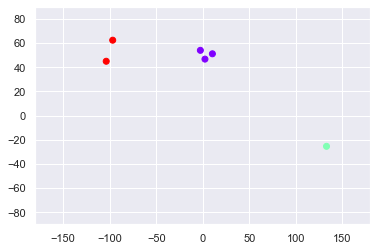

In [51]:
plt.scatter(data["Longitude"],data['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

# Clustering categorical data

In [52]:
# Notice from the country data that , there is a certain featue that we did not use in 
#when we did the clustering above. That is the language feature.So we are going to use it here

In [53]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Map the data

In [81]:
#we have to encode our categorical features into numeric values
data_mapped=data.copy()
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


## Select the features

In [87]:
x=data_mapped.iloc[:,1:4]

In [88]:
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


## Clustering

In [89]:
kmeans=KMeans(3)

In [90]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [91]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, 2, 2, 1])

In [92]:
data_with_clusters=data_mapped.copy()
data_with_clusters['Clusters']=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,2
4,Germany,51.15,10.40,2,2
5,Australia,-25.45,133.11,0,1


<function matplotlib.pyplot.show(close=None, block=None)>

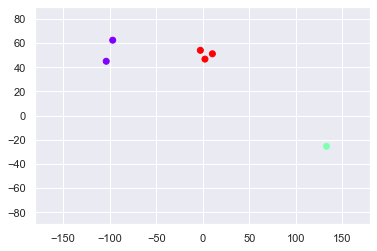

In [93]:
plt.scatter(data["Longitude"],data['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [94]:
#But how do we know the number of clusters to select?

## Selecting the number of clusters

Within clusters sum of -WCSS

In [96]:
kmeans.inertia_
## to get the wcss

290.10523333333333

To plot the elbow, we need to find the wcss for 1,2...6 clusters
we write a function to do that

In [97]:
wcss=[]
#we have a total of 6 observations, so
for i in range(1,7):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [98]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

## The Elbow Method

Text(0, 0.5, 'Within Clusters Sum of Squares')

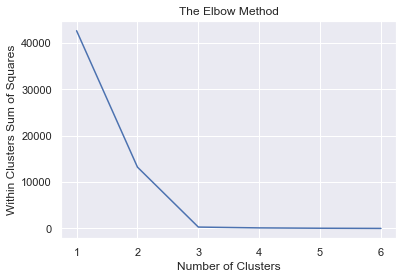

In [99]:
number_clusters=range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares')